# GAMES
Este proyecto busca analizar el dataset game en busca de insight

### Data wrangling
Here's a breakdown of the steps.

1. Import libraries.
2. Read the dataset.
3. Recognize the dataset using .info().
4. Take note of the corrections that we have to make.
5. Add a new column with total_sales values.

1. Import libraries.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import math as mt
import seaborn as sns
import plotly.express as px

2. Read the dataset.
3. Recognize the dataset using .info().

In [3]:
df=pd.read_csv('games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


4. Take note of the corrections that we have to make.

1. Column names don't follow the correct camel case naming convention; therefore, we are going to change them to the snake_case naming convention.
2. The 'Rating', 'Critic_Score' and 'Year_Of_Release' columns should have an 'int64' data type.
3. There are null values in the 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score' and 'Rating' columns.

In [4]:
# Let's make corrections:

# 1. Convert column names to lowercase
df.columns = df.columns.str.lower()

# 2. Ensure correct dtype for columns (float64)
display(df.head(5))

'''
As we can see, the 'rating' column is currently of object dtype, 'user_score' is of float64 dtype,
but 'year_of_release' and 'critic_score' should be int64. We need to fill in the null spaces before
changing the dtype because we cannot convert non-finite values (NA or inf) to integers. These columns
were identified as float64 due to the presence of null values.
'''

# ------------------------------------------------------year_of_release-------------------------------------------------------
# Replace missing values in 'year_of_release' with the median
# The median is used because there is no relationship with another column to replace values based on that column.
df['year_of_release']=df['year_of_release'].fillna(df['year_of_release'].median())

# Change the data type of 'year_of_release' to 'int64'
df['year_of_release'] = df['year_of_release'].astype('int64')

# --------------------------------------------------------critic_score-------------------------------------------------------
# Replace missing values in 'critic_score' with the median
# The median is used because there is no relationship with another column to replace values based on that column.
df['critic_score']=df['critic_score'].fillna(df['critic_score'].median())

# Change the data type of 'critic_score' to 'int64' (corrected comment)
df['critic_score'] = df['critic_score'].astype('int64')

# ---------------------------------------------------------user_score----------------------------------------------------------
# Replace missing values in 'user_score' with the median because there is no relationship with another column to replace values based on that column.
#The value 'tbd' could not be determined and has been replaced with the median.
median_user_score=df.query('user_score != "tbd" ')['user_score'].astype('float64').median()
df['user_score']=df['user_score'].fillna(median_user_score)
df['user_score']=df['user_score'].replace('tbd',median_user_score)
df['user_score']=df['user_score'].astype('float64')
# -----------------------------------------------------------rating----------------------------------------------------------
# There is no relationship between columns. Therefore, the best option is to set null values in 'rating' as 'NA'.
# A possible reason for null values in 'rating' could be problems at the moment of obtaining the data for the qualification values (critic_Score, user_score, and rating).
# There are 6621 null values at the same time in these columns.

df['rating']=df['rating'].fillna('N/A')

# Delete rows without 'name' and 'genre' columns
df = df.dropna(subset=['name', 'genre'])

print('-' * 55, 'corrected version', '-' * 55)

display(df.head(5))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


------------------------------------------------------- corrected version -------------------------------------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.5,N/A
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.5,N/A


5. Add a new column with total_sales values.

In [5]:
#column with the total sales
df['total_sales']=df['na_sales']+df['jp_sales']+df['other_sales']

### Data analysis
1. How many games were released in different years? Are the data from each period significant?

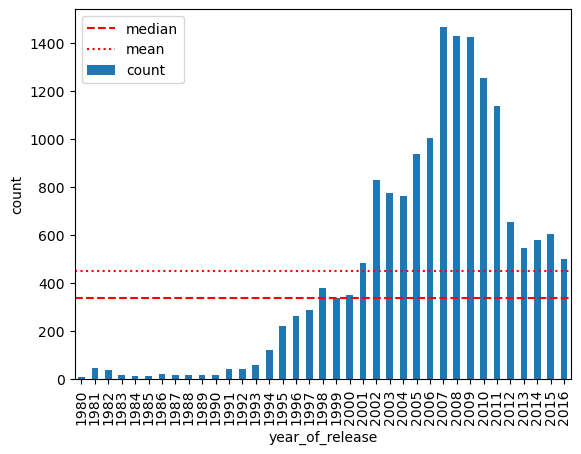

In [6]:
group=df.groupby('year_of_release').count()['name'].reset_index()
group.plot(kind='bar',x='year_of_release',y='name',ylabel='count')
plt.axhline(y=group['name'].median(), color='red', linestyle='--')
plt.axhline(y=group['name'].mean(), color='red', linestyle=':')
plt.legend(['median','mean','count'])
plt.show()

- The years where the most games were released were in 2009, 2010, 2011.
- The data is significant for each period; we observe an exponential curve reflecting an increase in video game sales until 2007, after which they began to decline and stabilize between 300 and 500 games per year.

2. Platform with the highest revenue
- The platform that has generated the highest revenue is " PS2 " with a total sales of $ 916.48 millions

The platform that has generated the highest revenue is " PS2 " with a total sales of $ 916.48 millions


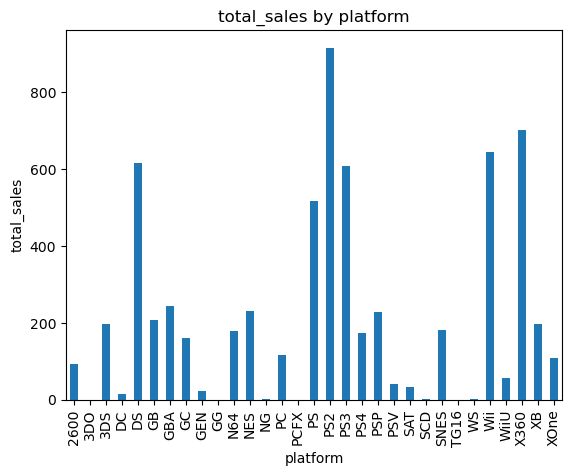

In [7]:
total_sales=df[['platform','total_sales']].groupby(by='platform').sum().reset_index()
max_sales=total_sales.query('total_sales==total_sales.max()')
print('The platform that has generated the highest revenue is "',max_sales.iloc[0,0],'" with a total sales of $',max_sales.iloc[0,1], 'millions')
total_sales.plot(kind='bar',x='platform',y='total_sales',legend=False,title='total_sales by platform',ylabel='total_sales')
plt.show()

3. How have the revenues been for this platform by year?

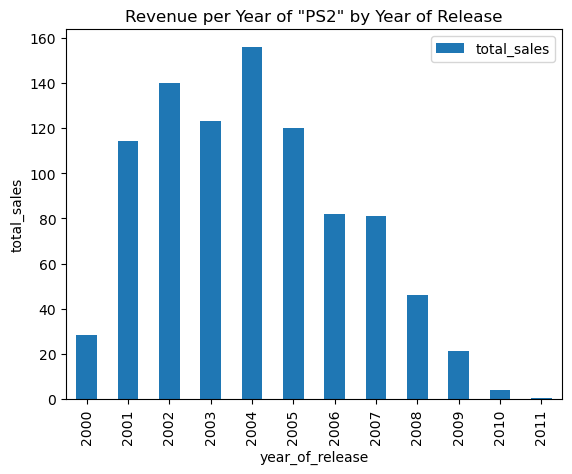

In [8]:
PS2_sale_by_year=df.query('platform=="PS2"')[['year_of_release','total_sales']].groupby('year_of_release').sum().reset_index()
PS2_sale_by_year.plot(kind='bar',x='year_of_release',y='total_sales',title='Revenue per Year of "PS2" by Year of Release',ylabel='total_sales')
plt.show()

4. Which platforms used to be popular but are no longer so?
- As we can see in the chart below, we have selected the top 8 platforms with the highest revenue, and we can notice that GBA, NES, PS, PS2 are platforms that were popular but are no longer so. Also, we can observe that before PS2 generated higher revenues than PS3, but PS2 is no longer popular.

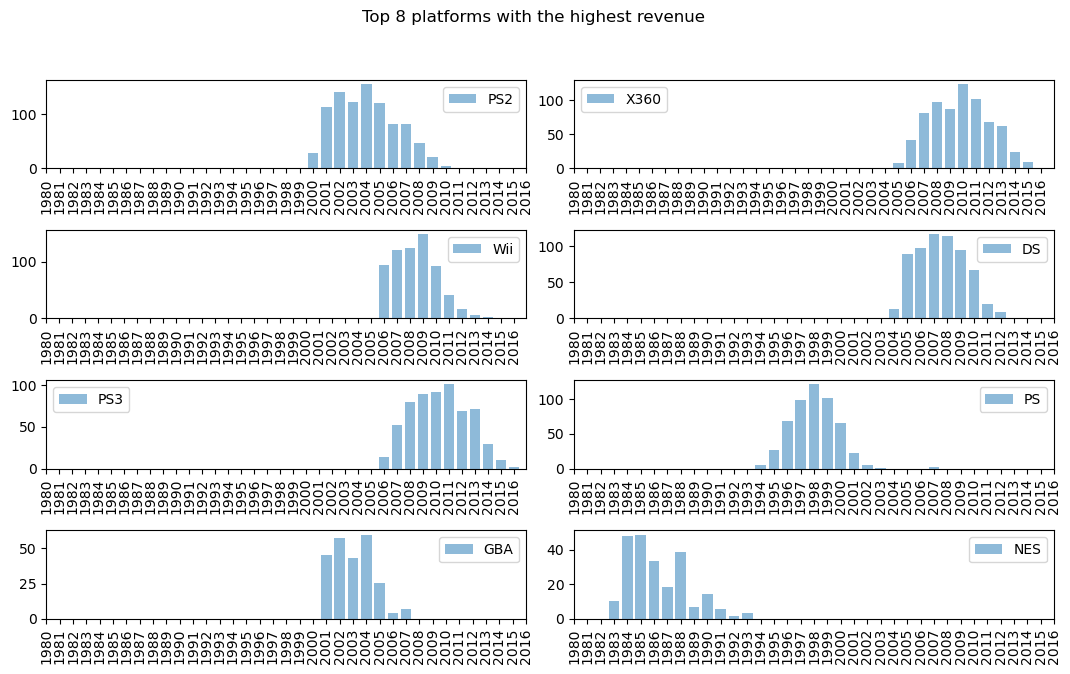

In [9]:
# Let's take the 8 platforms with the highest sales.
# We select only the columns: platform, total_sales, and year_of_release.
total_sales_by_platform = df[['platform', 'total_sales', 'year_of_release']]

# We obtain a DataFrame with all platforms sorted by "total_sales".
platforms_order_by_sales = total_sales_by_platform.groupby('platform').sum().reset_index().sort_values(by='total_sales', ascending=False)

# Create a list with the top 8 platforms with the highest revenue.
list_platform_ordered = platforms_order_by_sales['platform'].tolist()[:8]

# Group the original DataFrame by platform and year_of_release, summing the total_sales.
grouped = df[['platform', 'year_of_release', 'total_sales']].groupby(['platform', 'year_of_release']).sum().reset_index()

# Create a 2x2 subplot.
fig, ax = plt.subplots(4, 2, figsize=(13, 7))
c = -1

# Iterate through the subplots.
for fila, colu in [(0, 0), (0, 1), (1, 0), (1, 1),(2, 0),(2, 1),(3, 0),(3, 1)]:
    c += 1
    n = list_platform_ordered[c]
    
    # Plot a bar chart for each platform in the top 4.
    ax[fila, colu].bar(grouped.query('platform==@n')['year_of_release'], grouped.query('platform==@n')['total_sales'], alpha=0.5, label=n)
    ax[fila, colu].tick_params(axis='x', rotation=90)
    ax[fila, colu].set_xticks(np.arange(1980, 2017, 1))
    ax[fila, colu].legend()

# Adjust the space between subplots.
plt.subplots_adjust(hspace=0.7, wspace=0.1)

# Add a title to the entire figure.
fig.suptitle('Top 8 platforms with the highest revenue')

# Show the plot.
plt.show()


5. How much time does it take for an old platform to disappear, and how much time does it take for a new platform to appear?
- How are we going to solve this problem?
    - To address this issue, let's consider the minimum and maximum years when the annual revenues were above 10% of the maximum revenue value reached by the platform.
- As we can see in the dataframe displayed below, it takes about 1 year for a new platform to appear and 5 years for an old platform to disappear.

,index,platform,min_year,max_year,max_revenue,duration
0,17,2600,1980,2007,33.72,27
1,10,NES,1983,1991,48.76,8
2,8,GB,1989,2001,57.37,12
3,22,GEN,1990,1994,10.26,4
4,16,SNES,1990,1996,36.17,6
5,29,GG,1992,1992,0.04,0
6,25,NG,1993,1996,0.80,3
7,24,SCD,1993,1994,1.14,1
8,20,SAT,1994,1998,11.15,4
9,18,PC,1994,2016,16.09,22


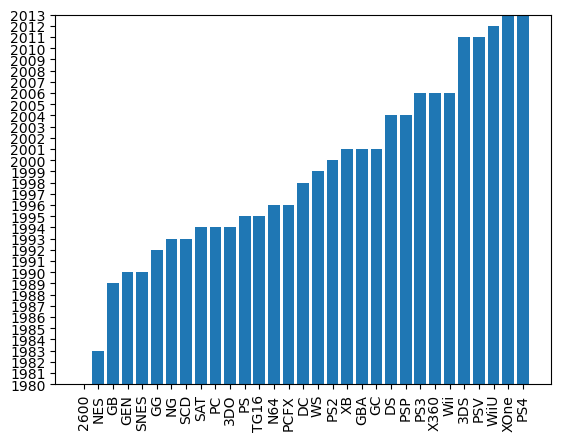

A new platform takes about 5.0 years to disappear
Approximately every  1.1  years, a new platform appears.


In [10]:
# Let's take the maximum sales per platform per year
df_short = df[['platform', 'year_of_release', 'total_sales']]

# Step 1: Calculate the total sales per platform per year
max_revenue_step1 = df_short.groupby(['platform', 'year_of_release']).sum().reset_index()

# Step 2: Find the maximum revenue for each platform
max_revenue = max_revenue_step1[['platform', 'total_sales']].groupby(['platform']).max().rename(columns={'total_sales': 'max_revenue'}).reset_index()

# We take the year where the revenues exceed 10% of the maximum revenue for that platform per year.
# 1. Add a new column to use the 'query' method
data_frame_step1 = max_revenue_step1.merge(max_revenue[['platform', 'max_revenue']], on='platform', how='left')

# Keep only the rows with the years where the revenue is at least 10% of the maximum revenue per year for the platform.
data_frame_step2 = data_frame_step1.query('total_sales >= max_revenue * 0.1').sort_values(by='max_revenue', ascending=False)

# Now we can select the max year and the minimum year for each platform
newdataframe = pd.DataFrame(columns=['platform', 'min_year', 'max_year', 'max_revenue'])
for n in data_frame_step2['platform'].unique():
    df_mid_process = data_frame_step2.query('platform == @n')
    max_year = df_mid_process['year_of_release'].max()
    min_year = df_mid_process['year_of_release'].min()
    
    # Create a new row for the dataframe
    new_row = {'platform': n, 'min_year': min_year, 'max_year': max_year,
               'max_revenue': df_mid_process['total_sales'].max()}
    
    # Concatenate the new row to the dataframe
    lista = [newdataframe, pd.DataFrame([new_row])]
    newdataframe = pd.concat(lista, ignore_index=True, axis=0)

# Sort the dataframe and apply reset_index()
newdataframe = newdataframe.sort_values(by='min_year').reset_index()
newdataframe['duration'] = newdataframe['max_year'] - newdataframe['min_year']

# Display the first 30 rows of the dataframe
display(newdataframe.head(30))

# Plotting
plt.yticks(np.arange(1980, 2014, 1))  # Year range from 1980 to 2013
plt.bar(newdataframe['platform'], newdataframe['min_year'])
plt.tick_params(axis='x', rotation=90)
plt.ylim(1980, 2013)
plt.show()

# Print the median duration of platforms disappearing
print('A new platform takes about', newdataframe['duration'].median(), 'years to disappear')

# Print the mean time between appearances of new platforms
print('Approximately every ', newdataframe['min_year'].diff().mean(), ' years, a new platform appears.')


6. What platforms are sales leaders?
- As we can see in the chart titled "Top 8 platforms with the highest revenue," the top 8 platform leaders in sales are listed.
7. Which ones are growing, and which ones are decreasing?
- All of these platforms have been decreasing over time, but it is notable that PS2, X360, and PS3 are platforms with good revenues and have maintained a significant presence in the market.
8. What about the average sales by platform?
9. Are there significant differences between average sales by platform?
- In order to answer questions 8 and 9, we are going to create a box and whisker plot for the top 8 platforms with the highest revenue.
    - As we can see, there are no significant differences between average sales by platform. The chart shows that the median is located between 0 and 1 million for all platforms.

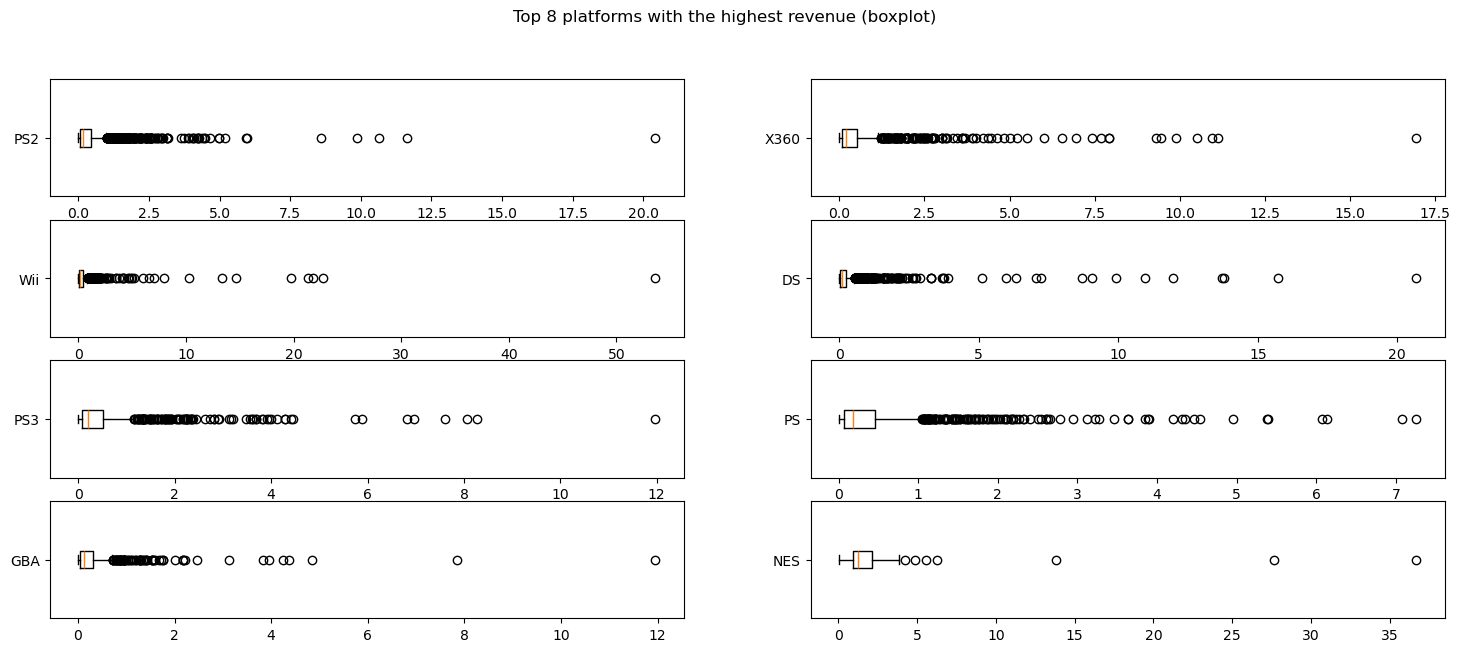

In [11]:
# Create a DataFrame containing only the 'platform' and 'total_sales' columns
boxplotdata_step1 = df[['platform', 'total_sales']]

# Create a figure and a grid of subplots (4 rows, 2 columns) with a larger figure size
fig, ax1 = plt.subplots(4, 2, figsize=(18, 7))

# Initialize a counter variable
c = -1

# Loop through each subplot position
for a, b in [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]:
    c += 1  # Increment counter

    # Let's use the list containing the top 8 platforms with the highest revenue
    # Get the platform name from the list
    n = list_platform_ordered[c]

    # Create a boxplot for the platform's total sales on the current subplot
    # - Filter the DataFrame to only include the specific platform
    # - Set `vert=False` for horizontal boxplots
    # - Provide a label for the boxplot using the platform name
    ax1[a, b].boxplot(boxplotdata_step1.query('platform == @n')['total_sales'], vert=False, labels=[n])

# Set a title for the entire figure
fig.suptitle('Top 8 platforms with the highest revenue (boxplot)')

# Display the plot
plt.show()


10. Let's analyze how the critic_score and user_score affects sales on one of the most famous platforms, the PlayStation 2.
- As we can see in the chart below, there is a smooth correlation between user score and total sales, but not a clear correlation between critic score and total sales.
    -The correlation between "critic_score" an total_sales is:  -0.541
    -The correlation between "user_score" and total_sales is:  0.742

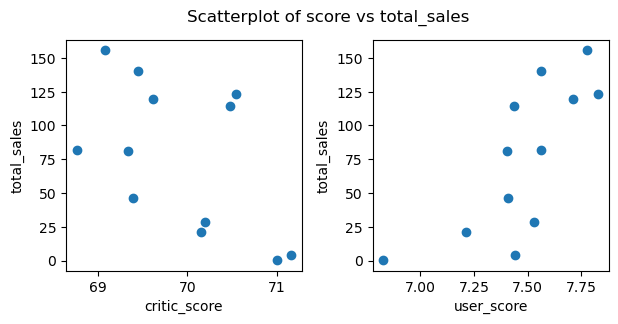

THe correlation between "critic_score" an total_sales is:  -0.5401922112942567
THe correlation between "user_score" and total_sales is:  0.742913146699091


In [12]:
# This line creates a new dataframe (df_score_step1) containing only the columns we need:
# platform, year_of_release, critic_score, user_score, and total_sales
df_score_step1 = df[['platform', 'year_of_release', 'critic_score', 'user_score', 'total_sales']]

# This line filters the dataframe to only include rows where the 'platform' is "PS2"
df_score_step1 = df_score_step1.query('platform == "PS2"')

# This line creates a new dataframe (df_score_step2) by grouping the data in df_score_step1
# by the 'year_of_release' column
df_score_step2 = df_score_step1[['year_of_release', 'critic_score', 'user_score', 'total_sales']].groupby(by=['year_of_release'])

# This line calculates summary statistics for each group in df_score_step2:
# sum for 'total_sales', mean for 'critic_score' and 'user_score'
# The results are stored in a new dataframe (df_score)
df_score = df_score_step2.agg({'total_sales': 'sum', 'critic_score': 'mean', 'user_score': 'mean'}).reset_index()

# This line creates a figure (fig) and two subplots (ax1) in a 1x2 grid with a figure size of 7x3
fig, ax1 = plt.subplots(1, 2, figsize=(7, 3))

# This line creates a scatter plot on the first subplot (ax1[0])
# with 'critic_score' on the x-axis and 'total_sales' on the y-axis
ax1[0].scatter(df_score['critic_score'], df_score['total_sales'])

# This line sets labels for the x and y axes of the first subplot
ax1[0].set_xlabel('critic_score')
ax1[0].set_ylabel('total_sales')

# This line creates a scatter plot on the second subplot (ax1[1])
# with 'user_score' on the x-axis and 'total_sales' on the y-axis
ax1[1].scatter(df_score['user_score'], df_score['total_sales'])

# This line sets labels for the x and y axes of the second subplot
ax1[1].set_xlabel('user_score')
ax1[1].set_ylabel('total_sales')

# This line sets a title for the entire figure
fig.suptitle('Scatterplot of score vs total_sales')

# This line adjusts the spacing between the subplots
plt.subplots_adjust(wspace=0.3)

# This line displays the plot
plt.show()

# This line calculates and prints the correlation between critic_score and total_sales, 
# and between user_score and total_sales.
print('THe correlation between "critic_score" an total_sales is: ',df_score['critic_score'].corr(df_score['total_sales']))
print('THe correlation between "user_score" and total_sales is: ',df_score['user_score'].corr(df_score['total_sales']))


10. Let's compare the revenue of the same games on PS2 to their revenue on other platforms.
    - As we can see, PS2 has the most sales of these games, and it also has the higher revenues.

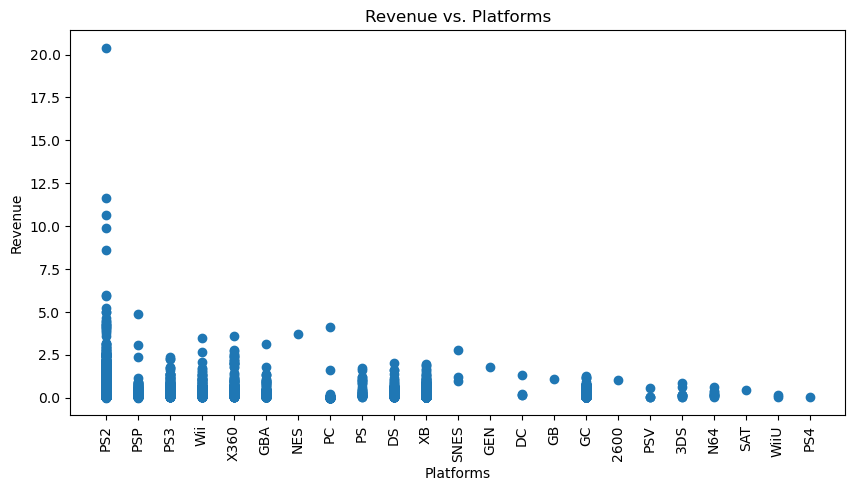

In [13]:
# Create a list containing PS2 games
games_of_ps2=df[['name','platform']].query('platform=="PS2"')['name'].unique()

# Select other platforms with games present in the PS2 
other_platforms=df[['name','platform','total_sales']].query('name in @games_of_ps2')

# Create a scatter plot to visualize revenue across platforms
plt.figure(figsize=(10, 5))
plt.scatter(other_platforms['platform'], other_platforms['total_sales'])
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Platforms')  # Capitalize "Platforms" for consistency
plt.ylabel('Revenue')  # Capitalize "Revenue" for consistency
plt.title('Revenue vs. Platforms')  # Capitalize "Revenue" and "Platforms"
plt.show()


11. Let's analyse the profit based on the genre, which genre is the most profitable?
- As we can see in the chart bellow, the most profitable genre is 'Action' followed by 'Sports' and 'Role-Playing'
- We cannot generalize because it depends on the region. A genre could be more profitable in Japan than in the US. We will analyze this situation next.

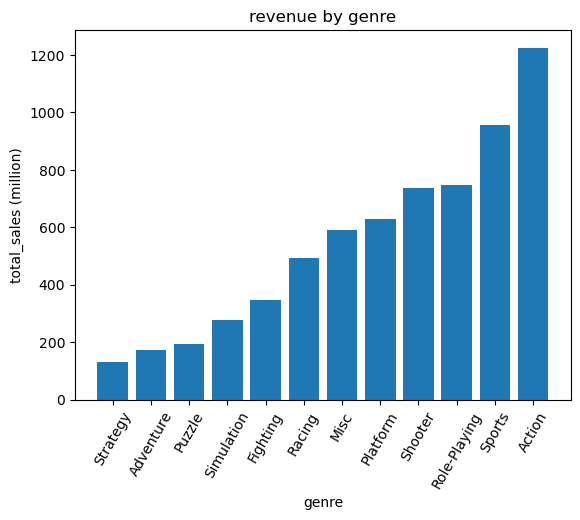

In [14]:
#let's group by 'genre'
#We just keep the columns necesaries
# -'total_sales','genre'
genre_vs_revenues=df[['total_sales','genre']].groupby('genre').sum().reset_index()
#This line sort the values by 'total_sales'
genre_vs_revenues=genre_vs_revenues.sort_values(by='total_sales')
plt.bar(genre_vs_revenues['genre'],genre_vs_revenues['total_sales'])
plt.tick_params(axis='x', rotation=60)
plt.xlabel('genre')
plt.ylabel('total_sales (million)')
plt.title('revenue by genre')
plt.show()

12. Let's answer the following points
- Top 5 profitable platform by region
- TOp 5 profitable genre on this plarfoms
- How qualifications in ESRB  affects the revenues by region ?

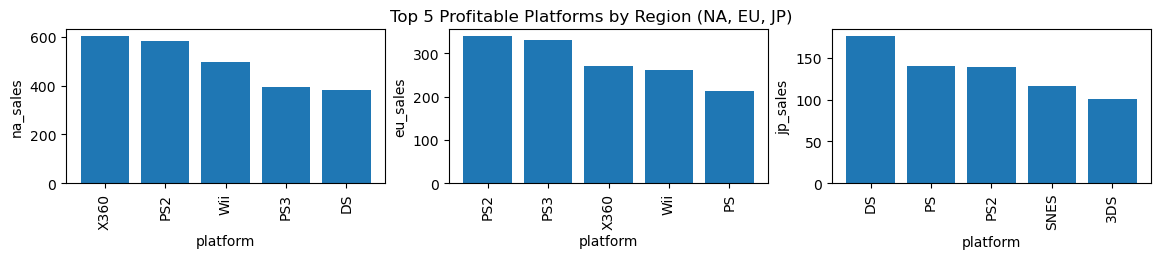

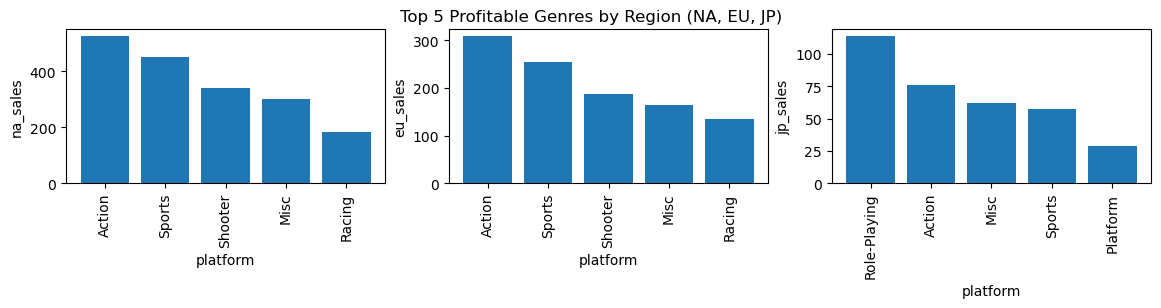

In [15]:
#Let's take just the columns we need
revenue_by_region_step1=df[['platform','genre','na_sales','eu_sales','jp_sales']]
#Let's group by paltform and make a sum
revenue_by_region_step2=revenue_by_region_step1.groupby('platform').sum(numeric_only=True).reset_index()#numeric_only True to avoid 'genre' column
#We create the figure
fig,ax=plt.subplots(1,3,figsize=(14,2))
#let's take just the top 5 platform for na region
xy=revenue_by_region_step2.sort_values(by='na_sales',ascending=False).iloc[:5]
#Let's save the top 5 plaforms for jp region
na_sales_platforms_list=xy['platform'].tolist()
ax[0].bar(xy['platform'],xy['na_sales'])
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_xlabel('platform')
ax[0].set_ylabel('na_sales')

#let's take just the top 5 platform for eu region
xy=revenue_by_region_step2.sort_values(by='eu_sales',ascending=False).iloc[:5]
#Let's save the top 5 plaforms for jp region
eu_sales_platforms_list=xy['platform'].tolist()
ax[1].bar(xy['platform'],xy['eu_sales'])
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_xlabel('platform')
ax[1].set_ylabel('eu_sales')

#let's take just the top 5 platform for jp region
xy=revenue_by_region_step2.sort_values(by='jp_sales',ascending=False).iloc[:5]
#Let's save the top 5 plaforms for jp region
jp_sales_platforms_list=xy['platform'].tolist()
ax[2].bar(xy['platform'],xy['jp_sales'])
ax[2].tick_params(axis='x', rotation=90)
ax[2].set_xlabel('platform')
ax[2].set_ylabel('jp_sales')

# This line sets a title for the entire figure
fig.suptitle('Top 5 Profitable Platforms by Region (NA, EU, JP)')

#-------------------------------------------------------------------------------------------------------------------------------------


#Let's grafic The top 5 profitable genre for each region
#This line create a new figure
fig1,ax1=plt.subplots(1,3,figsize=(14,2))

#Let's just select the top 5 platform for na region
revenue_by_region_step3=revenue_by_region_step1.query('platform in @na_sales_platforms_list')

#Let's group by 'genre' and just select the necesaries columns
revenue_by_region_step4=revenue_by_region_step3[['genre','na_sales','eu_sales','jp_sales']].groupby('genre').sum(numeric_only=True).reset_index()

#let's take just the top 5 genre for the top 5 platform for na region
xy=revenue_by_region_step4.sort_values(by='na_sales',ascending=False).iloc[:5]
ax1[0].bar(xy['genre'],xy['na_sales'])
ax1[0].tick_params(axis='x', rotation=90)
ax1[0].set_xlabel('platform')
ax1[0].set_ylabel('na_sales')

#let's take just the top 5 genre for the top 5 platform for eu region
xy=revenue_by_region_step4.sort_values(by='eu_sales',ascending=False).iloc[:5]
ax1[1].bar(xy['genre'],xy['eu_sales'])
ax1[1].tick_params(axis='x', rotation=90)
ax1[1].set_xlabel('platform')
ax1[1].set_ylabel('eu_sales')

#let's take just the top 5 genre for the top 5 platform for jp region
xy=revenue_by_region_step4.sort_values(by='jp_sales',ascending=False).iloc[:5]
ax1[2].bar(xy['genre'],xy['jp_sales'])
ax1[2].tick_params(axis='x', rotation=90)
ax1[2].set_xlabel('platform')
ax1[2].set_ylabel('jp_sales')

# This line sets a title for the entire figure
fig1.suptitle('Top 5 Profitable Genres by Region (NA, EU, JP)')

#this line display de chart
plt.show()


- As we can see in the first chart above, the top 5 porfitable platforms are almost the same for the 3 regions, but for example:
    - PS is not popular in NA.
    - Xbox 360 (X360) is not popular in JP.
    - SNES is not popular in either EU or NA.
    - Wii is not popular in JP.
- As we can see in the second chart above, the top 5 profitable genres in the top 5 profitable platforms by region are almost the same, but for example:
    - Role-Playing is the most profitable genre in JP.
    - Platform and Role-Playing genres are not as popular as in the rest of the regions.
    - Shooter and Racing genres are not popular in JP.

What about the last point ?
- How qualifications in ESRB  affects the revenues by region ?

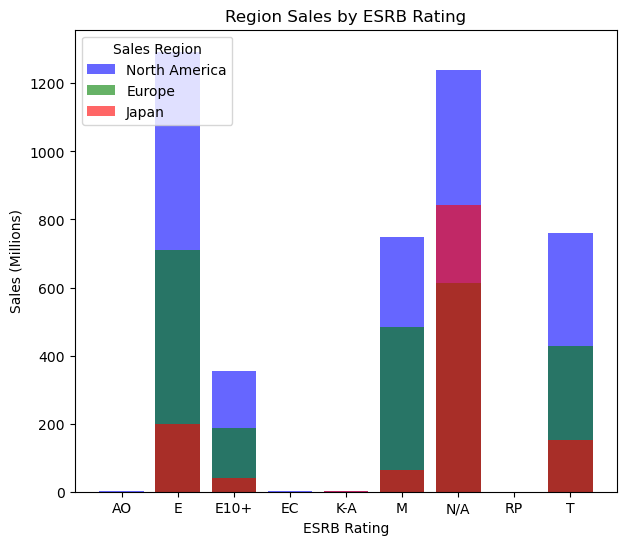

  rating  na_sales  eu_sales  jp_sales
0     AO      1.26      0.61      0.00
1      E   1292.99    710.25    198.11
2   E10+    353.32    188.52     40.20
3     EC      1.53      0.11      0.00
4    K-A      2.56      0.27      1.46
5      M    748.48    483.97     64.24
6    N/A   1240.68    613.30    841.93
7     RP      0.00      0.08      0.00
8      T    759.75    427.03    151.40


In [54]:
# Select the columns we need for the analysis (NA Sales, EU Sales, JP Sales, and Rating)
revenue_region_score_step1 = df[['na_sales', 'eu_sales', 'jp_sales', 'rating']]

# Group the DataFrame by 'rating' to analyze sales per rating
revenue_region_score_step2 = revenue_region_score_step1.groupby('rating')

# Calculate the total sales per region and rating, and reset the index to create a new DataFrame
revenue_region_score = revenue_region_score_step2.sum().reset_index()

# Create a bar chart to visualize the sales by region
plt.figure(figsize=(7, 6))  # Adjust the figure size as needed

bars1 = plt.bar(revenue_region_score['rating'], revenue_region_score['na_sales'], color="blue", label="North America", alpha=0.6)
bars2 = plt.bar(revenue_region_score['rating'], revenue_region_score['eu_sales'], color="green", label="Europe", alpha=0.6)
bars3 = plt.bar(revenue_region_score['rating'], revenue_region_score['jp_sales'], color="red", label="Japan", alpha=0.6)

# Set chart title and labels for better understanding
plt.title("Region Sales by ESRB Rating")
plt.xlabel("ESRB Rating")
plt.ylabel("Sales (Millions)")

# Add a legend to distinguish between the regions in the chart
plt.legend(loc="upper left", title="Sales Region")  # Adjust loc and title as needed
plt.show()

# Display the DataFrame containing the calculated sales by region and rating
print(revenue_region_score)

- "E" has the biggest sales impact
    - The "E" rating has the biggest impact on sales, particularly in North America (NA) and Europe (EU), with revenues of $1292.99 million and $710.25 million, respectively.
    - Japan (JP) also has considerable sales for "E", but significantly lower than NA and EU, totaling $198.11 million.
- "M" and "T" also have significant impact
    - The "M" rating has the second-highest impact on sales in NA and EU, with revenues of $748.48 million and $483.97 million, respectively.
    - The "T" rating ranks third in JP, with revenues of $151.40 million, and fourth in NA and EU, with revenues of $759.75 million and $427.03 million, respectively.
- "AO", "E10+", "EC", "K-A", and "RP" have lower impact
- 'N/A' indicate a lack of information about the rating for some games

### HYPOTHESIS
- Average user scores for Xbox One and PC platforms are the same.
    - **Null hypothesis:** Average user scores for Xbox One is the same as for PC platforms
    - **Alternative hypothesis:** Average user scores for Xbox One is not the same as for PC platforms.
- Average user scores for Action and Sports genres are different.
    - **Null hypothesis:** Average user scores for Action and Sports genres are the same.
    - **Alternative hypothesis:** Average user scores for Action and Sports genres are not the same.

In [32]:
# Null hypothesis: Average user scores for Xbox One is the same as for PC platforms
# It's necessary to remind that this is a case of Paired samples (muestras emparejadas)

series1=df.query('platform=="XOne"')[['user_score']]
series2=df.query('platform=="PC"')[['user_score']]
alpha = 0.001#(0.1%)
results = st.ttest_ind(series1,series2,equal_var=False)

print('valor p:', results.pvalue[0])

if (results.pvalue<alpha):
    print("Null hypothesis is rejected")
else:
    print("We cannot reject the null hypothesis")

valor p: 4.964162612622159e-05
Null hypothesis is rejected


- As we can see, Null hypothesis is reject, the evidence suggests the average user scores differ between the platforms. This means that we cannot attribute the differences to random variability.

In [33]:
# Null hypothesis: Average user scores for Action and Sports genres are the same.
# It's necessary to remind that this is a case of Paired samples (muestras emparejadas)

series1=df.query('genre=="Action"')[['user_score']]
series2=df.query('genre=="Sports"')[['user_score']]
alpha = 0.001#(0.1%)
results = st.ttest_ind(series1,series2,equal_var=False)

print('valor p:', results.pvalue[0])

if (results.pvalue<alpha):
    print("Null hypothesis is rejected")
else:
    print("We cannot reject the null hypothesis")

valor p: 0.7159128316394157
We cannot reject the null hypothesis


- We cannot reject the null hypothesis, the evidence suggests that we can attribute the differences between the genres to random variability.